In [1]:
import os
import json
from pathlib import Path
import cv2
import numpy as np
from utils import read_img
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
data_dir=Path("data")
data_dir
train_dir=data_dir / "train"
test_dir=data_dir / "test"
print(train_dir)
print(test_dir)

data\train
data\test


In [3]:
json_files=list(train_dir.glob("*.json"))
print(json_files)

[WindowsPath('data/train/via_project_carplate_train.json'), WindowsPath('data/train/via_region_data.json')]


In [4]:
with open(json_files[0],"rb") as file:
     tmp0 = json.load(file)
with open(json_files[1],"rb") as file:
     tmp1 = json.load(file)
print(tmp0.keys())
print(tmp1.keys())

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])
dict_keys(['川A09X20.jpg45148', '川A019W2.jpg51190', '川A82M83.jpg49555', '川A095Q5.jpg56850', '川A105LR.jpg42767', '川A113YP.jpg45582', '川A561WP.jpg53011', '川A572F4.jpg51507', '川A762ZS.jpg42940', '川A88888.jpg43912', '川AA662F.jpg62588', '川AE8H60.jpg24996', '川AEK882.jpg60559', '川AGU052.jpg50021', '川AGU801.jpg63728', '川AKM065.jpg49168', '川AKQ291.jpg54087', '川AL0Q87.jpg62591', '川AM1186.jpg63148', '川AN4E10.jpg45235', '川AR9X49.jpg49917', '川AS9V79.jpg47739', '川AUU093.jpg43951', '川AY116F.jpg46355', '川AZ408T.jpg26517', '川C28888.jpg70854', '川R35779.jpg26786', '赣A82F36.jpg254156', '赣A88888.jpg16265', '赣K11978.jpg275990', '桂ATK071.jpg315088', '黑A1R272.jpg436425', '黑A16341.jpg10542', '黑AB4444.jpg38530', '沪A51V39.jpg363741', '沪AGH092.jpg421066', '沪ALB022.jpg69211', '沪AP0910.jpg300162', '沪B683J8.jpg53674', '沪D71603.jpg188337', '沪J32500.jpg417849', '沪JS6999.jpg3255625', '沪K62933.jpg221094', '沪KT5583.jpg3484233', '冀FA3215.jpg253377', '津AHP

川A09X20.jpg45148 has a region at ([320, 442, 447, 323], [281, 261, 310, 336])


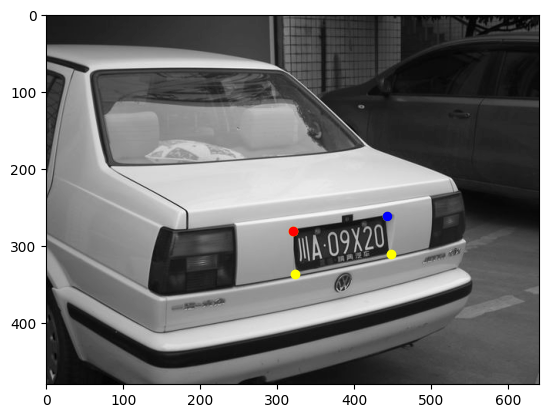

In [5]:
def extract_region(one_car_info):
    region=one_car_info["regions"][0] # only one region
    xs=region["shape_attributes"]["all_points_x"]
    ys=region["shape_attributes"]["all_points_y"]
    return xs,ys

key="川A09X20"
tmp1_key=[kkk  for kkk in tmp1.keys() if kkk[:7]==key][0] # only one

img=read_img(train_dir / (key+".jpg"),0)
img_region=extract_region(tmp1[tmp1_key])
print(f"{tmp1_key} has a region at {img_region}")

plt.imshow(img,cmap="gray")
plt.scatter(*img_region,c="yellow",)
plt.scatter(320,281,c="red")
plt.scatter(442,261,c="blue")
rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

In [7]:
tmp=np.zeros(3)
tmp.copy()

array([0., 0., 0.])